In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np
import seaborn as sns
#from sklearn.svm import SVC
#from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('android.csv')

In [3]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [4]:
data.shape

(70, 17)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,sublime,0.157,4.000,0.237,41.0,0.922,29.45,31.54,0.42,0.75,81212.0,13.95,72923,85.676,17267.0,2313615,0
1,whoami,0.150,0.523,0.000,50.0,0.035,3599.01,2861.55,37.76,0.95,134083.0,11.20,94940,82.799,15177.0,2278579,0
2,find,0.406,0.956,0.056,11.0,0.032,306.46,368.78,11.98,0.31,53105.0,0.53,27445,106.372,1582.0,971729,0
3,xlogo,0.003,15.000,1.000,15.0,0.501,249.21,276.10,2.84,0.97,161843.0,9.23,88616,68.517,19949.0,2126810,0
4,13943,0.488,0.795,0.000,37.0,0.738,216.57,188.24,1.18,1.83,86205.0,12.66,93244,107.295,12601.0,2237832,1


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='malware', ylabel='count'>

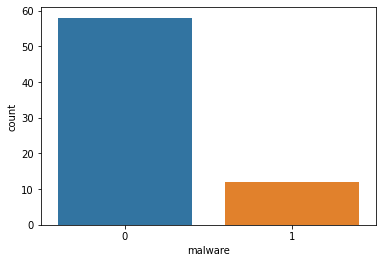

In [8]:
sns.countplot(x='malware',data=data)

In [9]:
target_count = data.malware.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 58
Class 1: 12


In [10]:
count_class_0, count_class_1 = data.malware.value_counts()

In [11]:
df_class_0 = data[data['malware'] == 0]
df_class_1 = data[data['malware'] == 1]

In [12]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [13]:
df_test_over.shape

(116, 17)

<AxesSubplot:xlabel='malware', ylabel='count'>

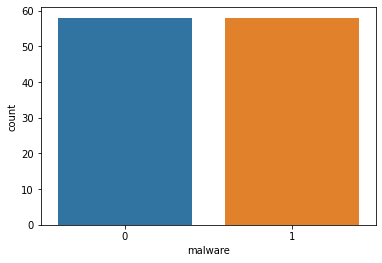

In [14]:
sns.countplot(x='malware',data=df_test_over)

In [15]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [16]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,sublime,0.157,4.000,0.237,41.0,0.922,29.45,31.54,0.42,0.75,81212.0,13.95,72923,85.676,17267.0,2313615
1,whoami,0.150,0.523,0.000,50.0,0.035,3599.01,2861.55,37.76,0.95,134083.0,11.20,94940,82.799,15177.0,2278579
2,find,0.406,0.956,0.056,11.0,0.032,306.46,368.78,11.98,0.31,53105.0,0.53,27445,106.372,1582.0,971729
3,xlogo,0.003,15.000,1.000,15.0,0.501,249.21,276.10,2.84,0.97,161843.0,9.23,88616,68.517,19949.0,2126810
5,apt,0.000,0.000,0.000,15.0,0.986,160.98,141.81,0.60,2.68,54996.0,22.02,82141,124.539,16145.0,1971552


In [17]:
Y.head()

,malware
0,0
1,0
2,0
3,0
5,0


In [18]:
from sklearn.utils import shuffle

In [19]:
X, Y=shuffle(X, Y)

In [20]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
12,43557,0.001,9.0,0.000,9.0,1.047,148.52,128.07,0.95,1.56,86291.0,13.61,89078,112.547,19866.0,2137934
7,43552,0.630,0.0,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
36,18585,0.174,0.0,0.000,19.0,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.0,2079722
43,40029,0.655,2.0,0.682,35.0,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389
55,gnome-session,0.882,4.0,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395


In [21]:
X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
12,0.001,9.0,0.000,9.0,1.047,148.52,128.07,0.95,1.56,86291.0,13.61,89078,112.547,19866.0,2137934
7,0.630,0.0,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
36,0.174,0.0,0.000,19.0,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.0,2079722
43,0.655,2.0,0.682,35.0,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389
55,0.882,4.0,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395


In [22]:
Y.head()

,malware
12,1
7,1
36,1
43,1
55,0


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
9,branches,976901.841560
14,ref-cycles,368723.048241
6,stalled-cycles-backend-percent,124582.207335
11,bus-cycle,50286.301527
5,stalled-cycles-frontend-percent,38991.206206
13,cache-references,6018.749658
7,Instructions-per-cycle,2767.492555
12,cache-misses-percent,369.916830
3,page-faults,151.195313
10,branch-misses-percent,102.511133


[0.08392537 0.03808146 0.03983386 0.04882717 0.04289274 0.02593241
 0.02677024 0.02713231 0.17545821 0.07561082 0.1581145  0.06546953
 0.09312841 0.02929115 0.06953182]


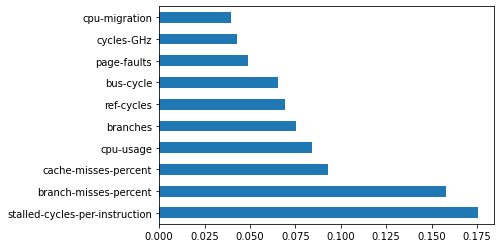

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [28]:
X_train.shape

(92, 15)

In [29]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
15,0.190,3.000,0.165,7.0,1.523,48.08,35.19,1.13,0.42,361733.0,2.93,84854,30.758,13.393,2109862
51,0.883,1.000,0.124,15.0,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.000,877674
8,0.001,0.814,0.542,57.0,0.211,502.59,506.51,7.29,0.69,157821.0,8.23,95511,121.297,12336.000,2292263
45,0.003,9.000,0.433,11.0,0.155,189.18,182.95,6.69,0.28,133521.0,7.03,93247,80.069,14925.000,2237933
36,0.174,0.000,0.000,19.0,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.000,2079722


In [30]:
.head()

,malware
15,0
51,0
8,0
45,0
36,1


In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [38]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [39]:
CNN1_model=Sequential([
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])

In [40]:
from keras.optimizers import Adam
CNN1_model.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

In [41]:
hist = CNN1_model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10


ValueError: in user code:

    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\ASUS\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: [None, 15]
